### Tarea 4
Consiste en la implementacion de la transformada de hough, la cual es importante para deteccion de lineas o circulos, se puede aplicar en mundo cotidiano como la detececcion de alineaciones mal realizadas en las pistas de avion.
En nuestro contexto y la solicitud de la tarea es realizar dicha implementacion para la deteccion de circulos dentro de la imagen con una imagen de salida con las siguientes caracteristicas:
1. circunferencia para cada circulo presente en la imagen
2. el radio de cada circulo encontrado

### Importaciones previas

In [139]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

### Preprocesamiento
Como se indica las imagenes previas a la aplicacion de la transformada para la deteccion de ciruclos se debe aplicar la deteccion de bordes con el metodo de canny.

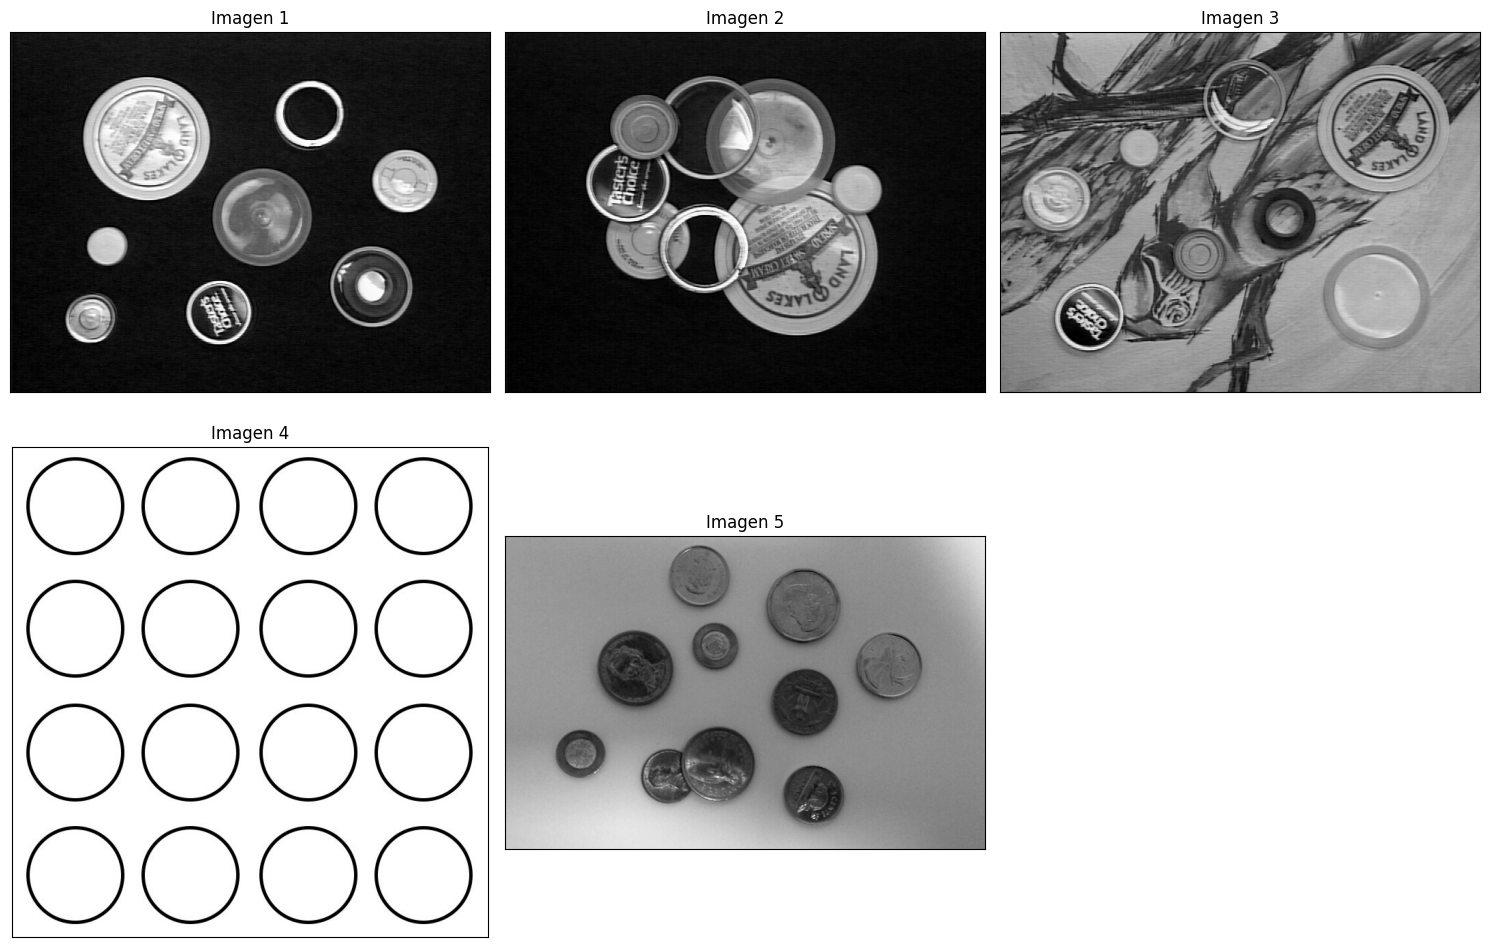

In [140]:
img1 = cv2.imread("circles1-0000.jpg")
img2 = cv2.imread("circles2-0000.jpg")
img3 = cv2.imread("circles3-0000.jpg")
img4 = cv2.imread("circles4.jpg")
img5 = cv2.imread("circles5.jpg")

# pasar a escala de grises
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2GRAY)
img5 = cv2.cvtColor(img5, cv2.COLOR_BGR2GRAY)

# mostrar imágenes
plt.figure(figsize=(15, 10))
plt.subplot(231), plt.imshow(img1, cmap='gray')
plt.title('Imagen 1'), plt.xticks([]), plt.yticks([])

plt.subplot(232), plt.imshow(img2, cmap='gray')
plt.title('Imagen 2'), plt.xticks([]), plt.yticks([])

plt.subplot(233), plt.imshow(img3, cmap='gray')
plt.title('Imagen 3'), plt.xticks([]), plt.yticks([])

plt.subplot(234), plt.imshow(img4, cmap='gray')
plt.title('Imagen 4'), plt.xticks([]), plt.yticks([])

plt.subplot(235), plt.imshow(img5, cmap='gray')
plt.title('Imagen 5'), plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()


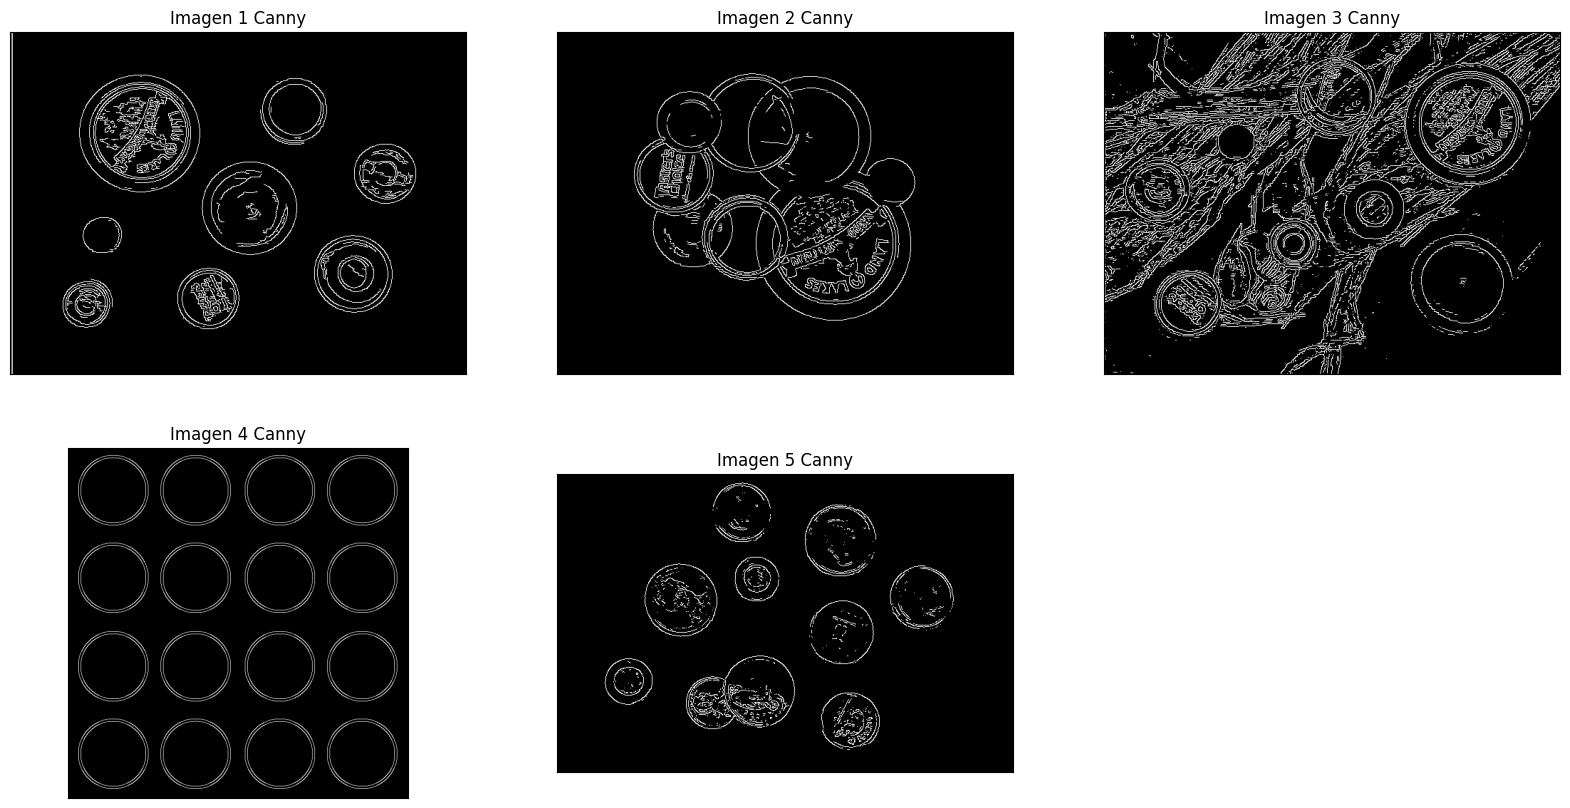

In [164]:
#aplicar canny a las imagenes
img1_canny = cv2.Canny(img1, 90, 200)
img2_canny = cv2.Canny(img2, 200, 250)
img3_canny = cv2.Canny(img3, 100, 100)
img4_canny = cv2.Canny(img4, 70, 200)
img5_canny = cv2.Canny(img5, 100, 100)
#mostrar imagenes canny
plt.figure(figsize=(20,10))
plt.subplot(231),plt.imshow(img1_canny, cmap='gray')
plt.title('Imagen 1 Canny'), plt.xticks([]), plt.yticks([])
plt.subplot(232),plt.imshow(img2_canny, cmap='gray')
plt.title('Imagen 2 Canny'), plt.xticks([]), plt.yticks([])
plt.subplot(233),plt.imshow(img3_canny, cmap='gray')
plt.title('Imagen 3 Canny'), plt.xticks([]), plt.yticks([])
plt.subplot(234),plt.imshow(img4_canny, cmap='gray')
plt.title('Imagen 4 Canny'), plt.xticks([]), plt.yticks([])
plt.subplot(235),plt.imshow(img5_canny, cmap='gray')
plt.title('Imagen 5 Canny'), plt.xticks([]), plt.yticks([])

plt.show()

## Implementacion Transformada de Hough

La implementacion del metodo es 

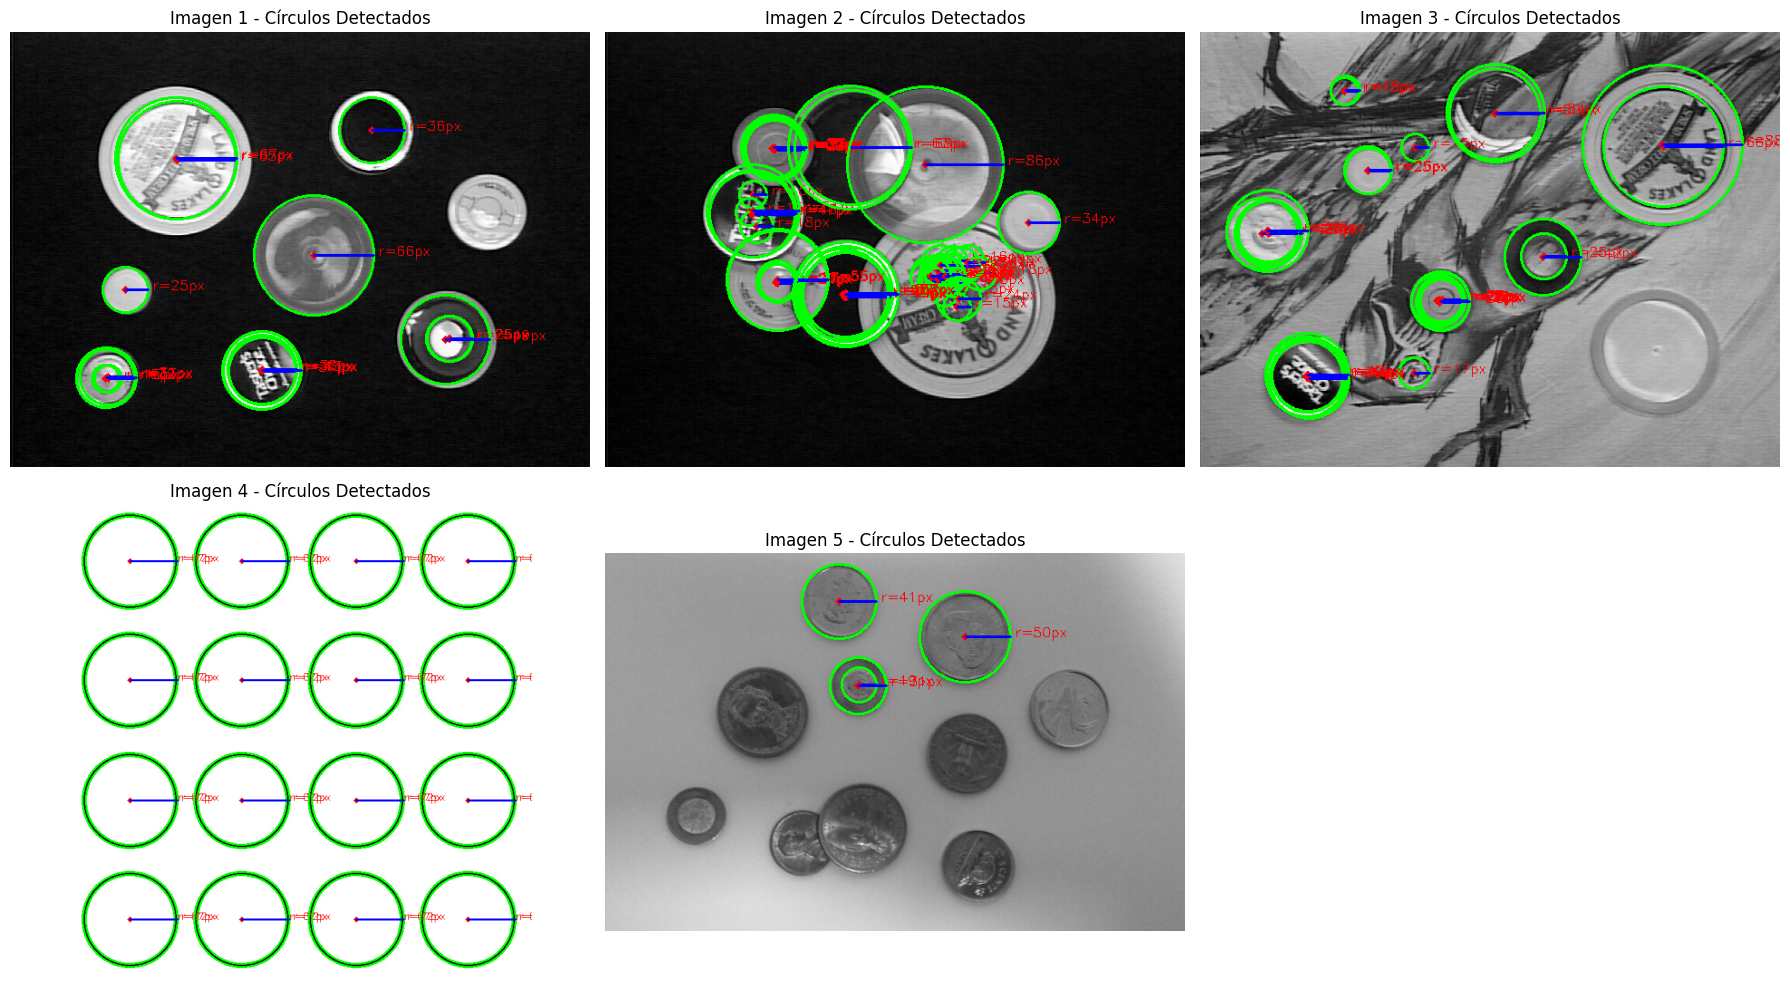

In [ ]:
def hough_circles_mejorado(canny_img, min_radius, max_radius):
    height, width = canny_img.shape
    acc_shape = (max_radius - min_radius, height, width)
    acc = np.zeros(acc_shape, dtype=np.uint64)
    edge_pixels = np.argwhere(canny_img > 0)
    thetas = np.deg2rad(np.arange(0, 360))
    cos_thetas = np.cos(thetas)
    sin_thetas = np.sin(thetas)
    for y, x in edge_pixels:
        for r_idx, r in enumerate(range(min_radius, max_radius)):
            b = (y - r * sin_thetas).astype(int)
            a = (x - r * cos_thetas).astype(int)
            valid_indices = (b >= 0) & (b < height) & (a >= 0) & (a < width)
            b_valid, a_valid = b[valid_indices], a[valid_indices]
            np.add.at(acc, (r_idx, b_valid, a_valid), 1)
    return acc

imagenes_canny = [img1_canny, img2_canny, img3_canny, img4_canny, img5_canny]
imagenes_originales = [img1, img2, img3, img4, img5]
min_radius = 15
max_radius = 110

plt.figure(figsize=(18, 10))
for idx, (canny_img, original_img) in enumerate(zip(imagenes_canny, imagenes_originales), 1):
    accumulator = hough_circles_mejorado(canny_img, min_radius, max_radius)
    threshold = 0.8 * accumulator.max()
    detected_circles_indices = np.argwhere(accumulator >= threshold)
    output_img = cv2.cvtColor(original_img, cv2.COLOR_GRAY2BGR)
    for r_idx, y, x in detected_circles_indices:
        r = r_idx + min_radius
        cv2.circle(output_img, (x, y), r, (0, 255, 0), 2)
        cv2.circle(output_img, (x, y), 2, (0, 0, 255), 3)
        cv2.line(output_img, (x, y), (int(x + r), y), (255, 0, 0), 2)
        cv2.putText(output_img, f"{r}px", (x + r + 5, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)
    plt.subplot(2, 3, idx)
    plt.title(f'Imagen {idx} - Círculos Detectados')
    plt.imshow(cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
plt.tight_layout()
plt.show()
